In [ ]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import warnings

warnings.filterwarnings("ignore")

# Model 1 - Predition of Inning Score

## Data Analysis

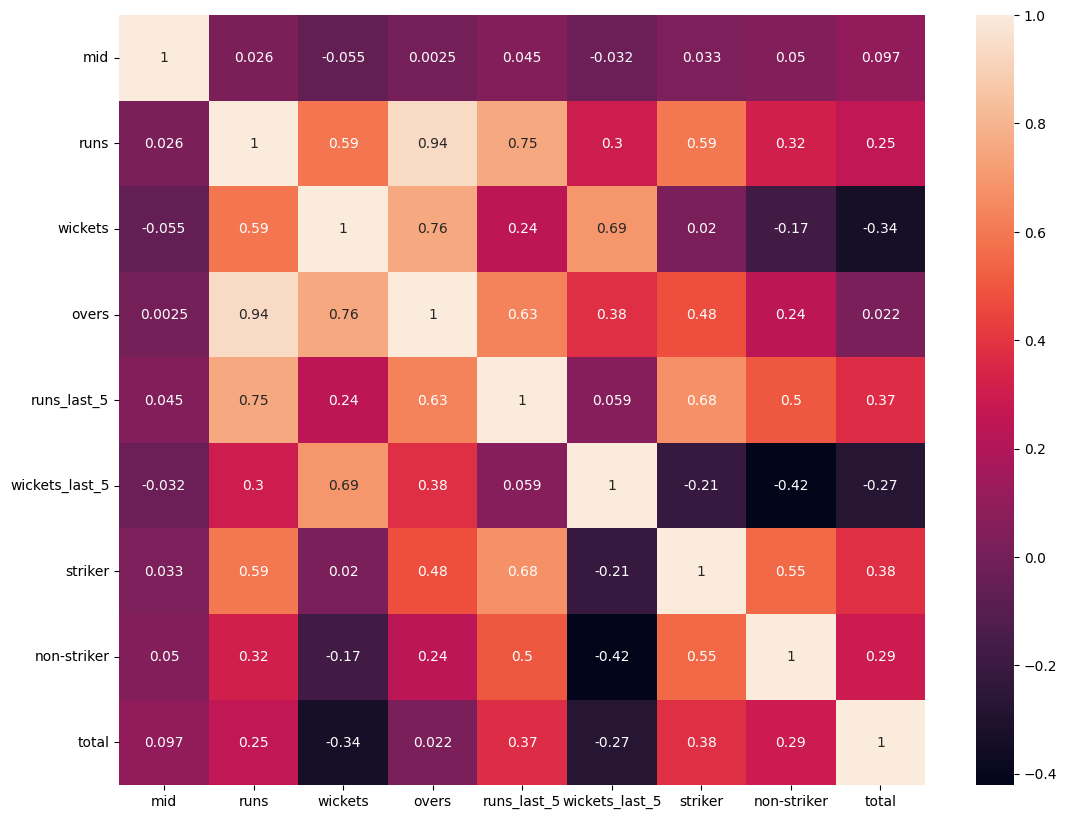

In [ ]:
data = pd.read_csv("/content/ipl.csv")

correlationMatrix = data.corr()
topFeatures = correlationMatrix.index

# Plotting the heatmap
plt.figure(figsize=(13,10))
g = sns.heatmap(data=data[topFeatures].corr(), annot=True)

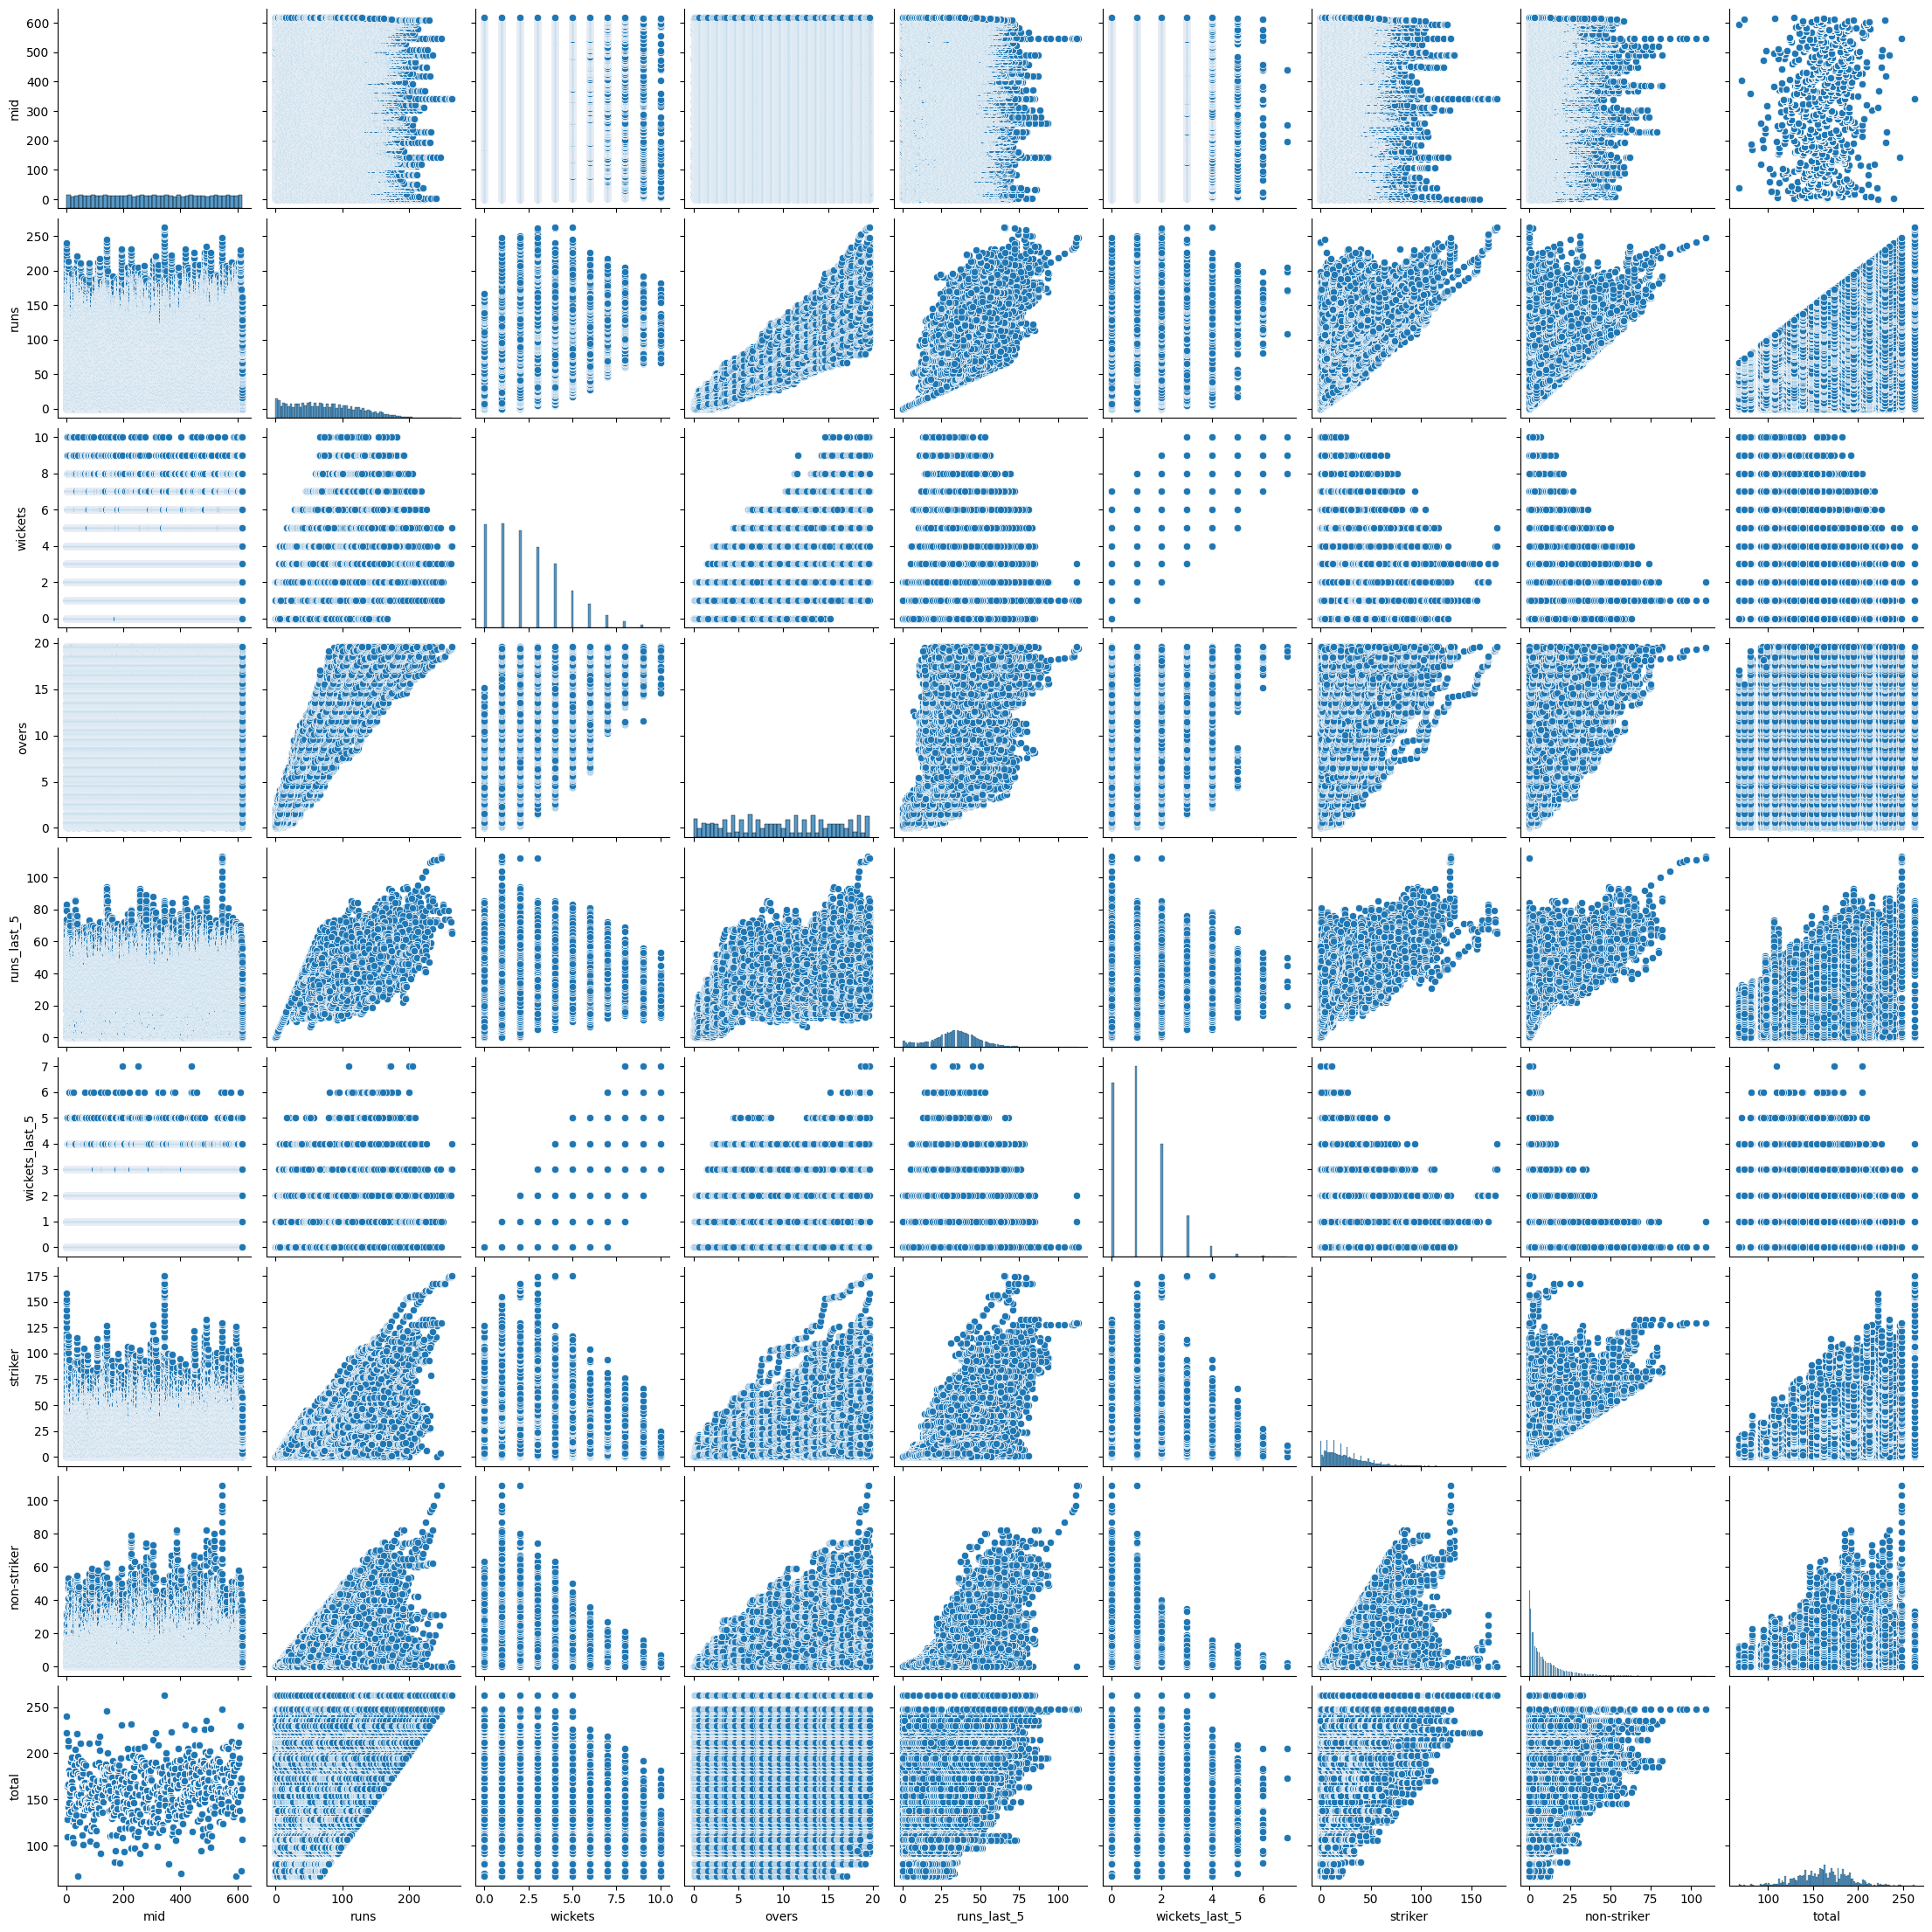

In [ ]:
newData = data[["bat_team", "bowl_team", "runs", "wickets", "overs", "runs_last_5", "wickets_last_5", "total"]]
sns.pairplot(data)
plt.show()

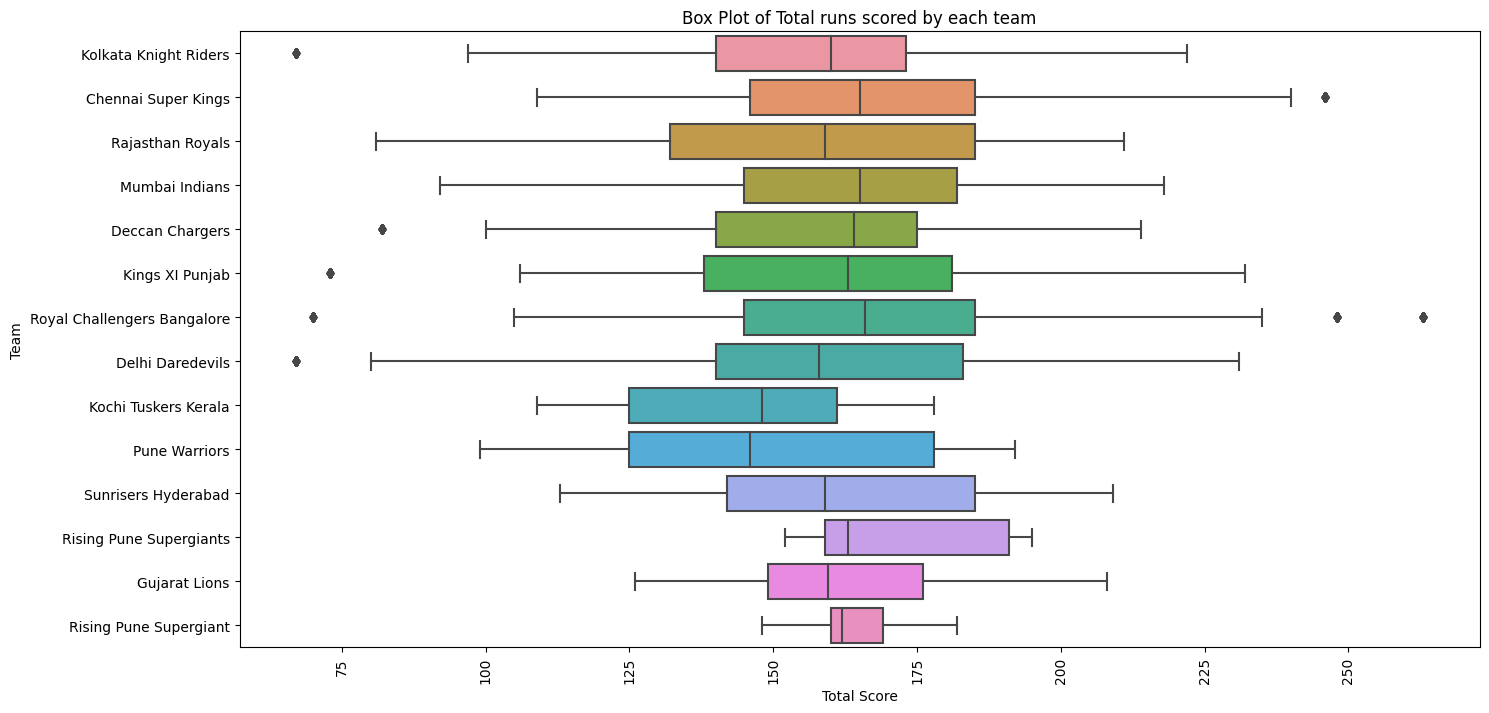

In [ ]:
plt.figure(figsize=(16, 8))
sns.boxplot(x="total", y="bat_team", data=data)
plt.title(f'Box Plot of Total runs scored by each team')
plt.ylabel('Team')
plt.xlabel('Total Score')
plt.xticks(rotation=90)
plt.show()

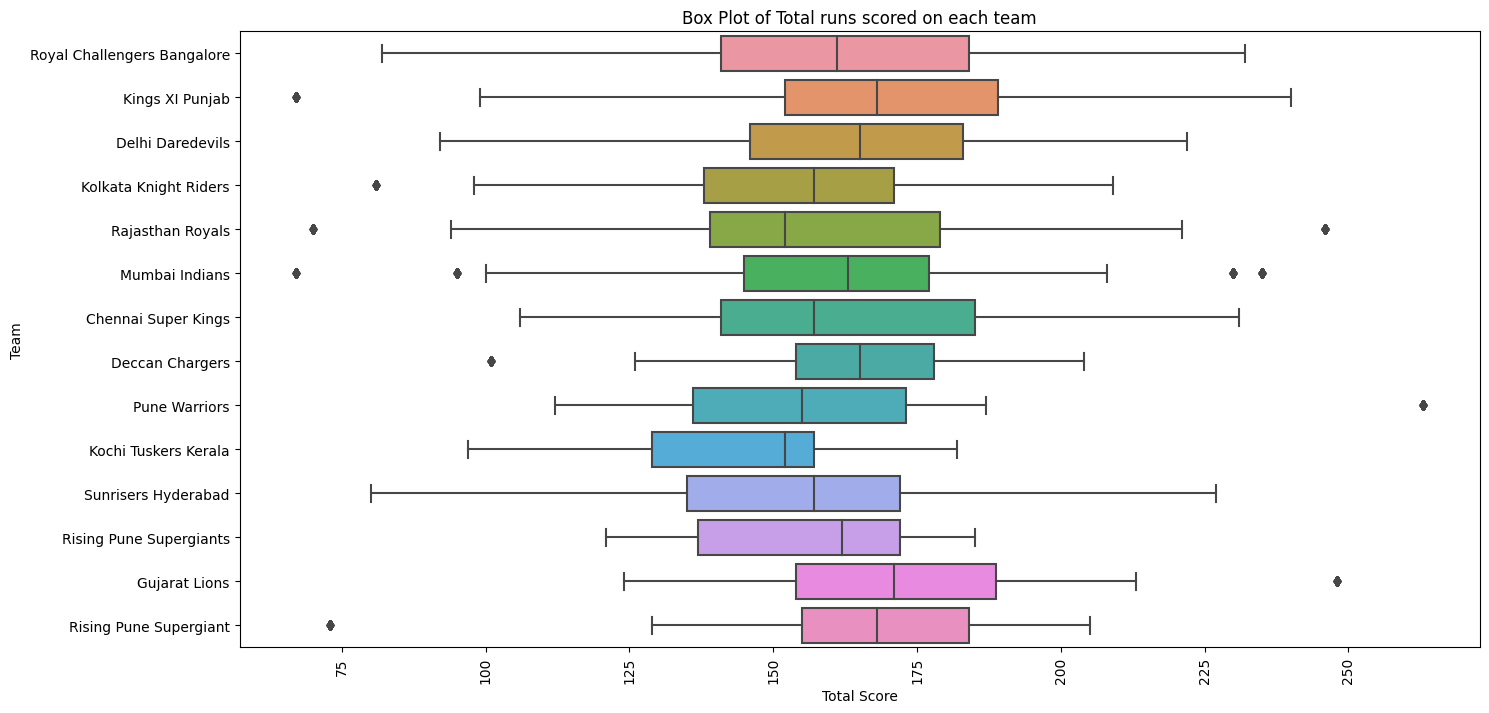

In [ ]:
plt.figure(figsize=(16, 8))
sns.boxplot(x="total", y="bowl_team", data=data)
plt.title(f'Box Plot of Total runs scored on each team')
plt.ylabel('Team')
plt.xlabel('Total Score')
plt.xticks(rotation=90)
plt.show()

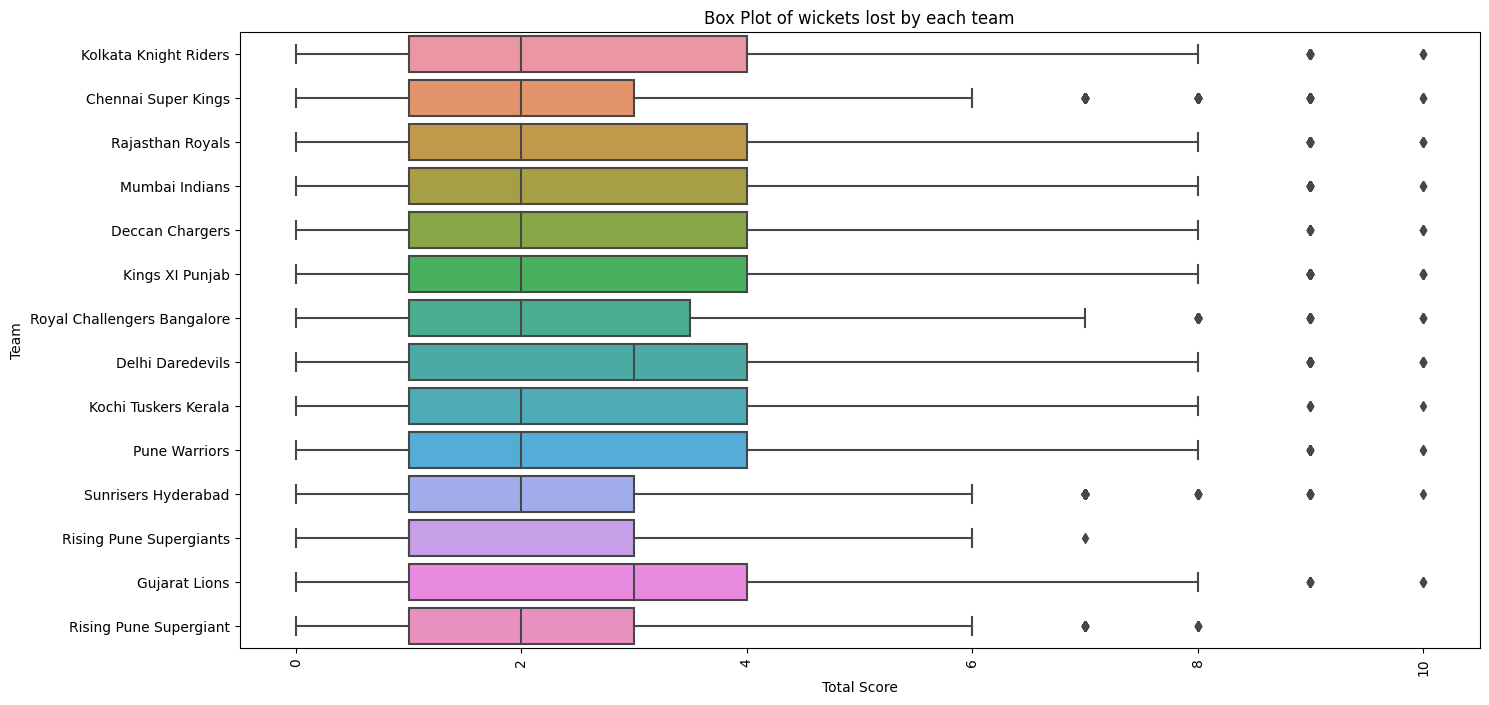

In [ ]:
plt.figure(figsize=(16, 8))
sns.boxplot(x="wickets", y="bat_team", data=data)
plt.title(f'Box Plot of wickets lost by each team')
plt.ylabel('Team')
plt.xlabel('Total Score')
plt.xticks(rotation=90)
plt.show()

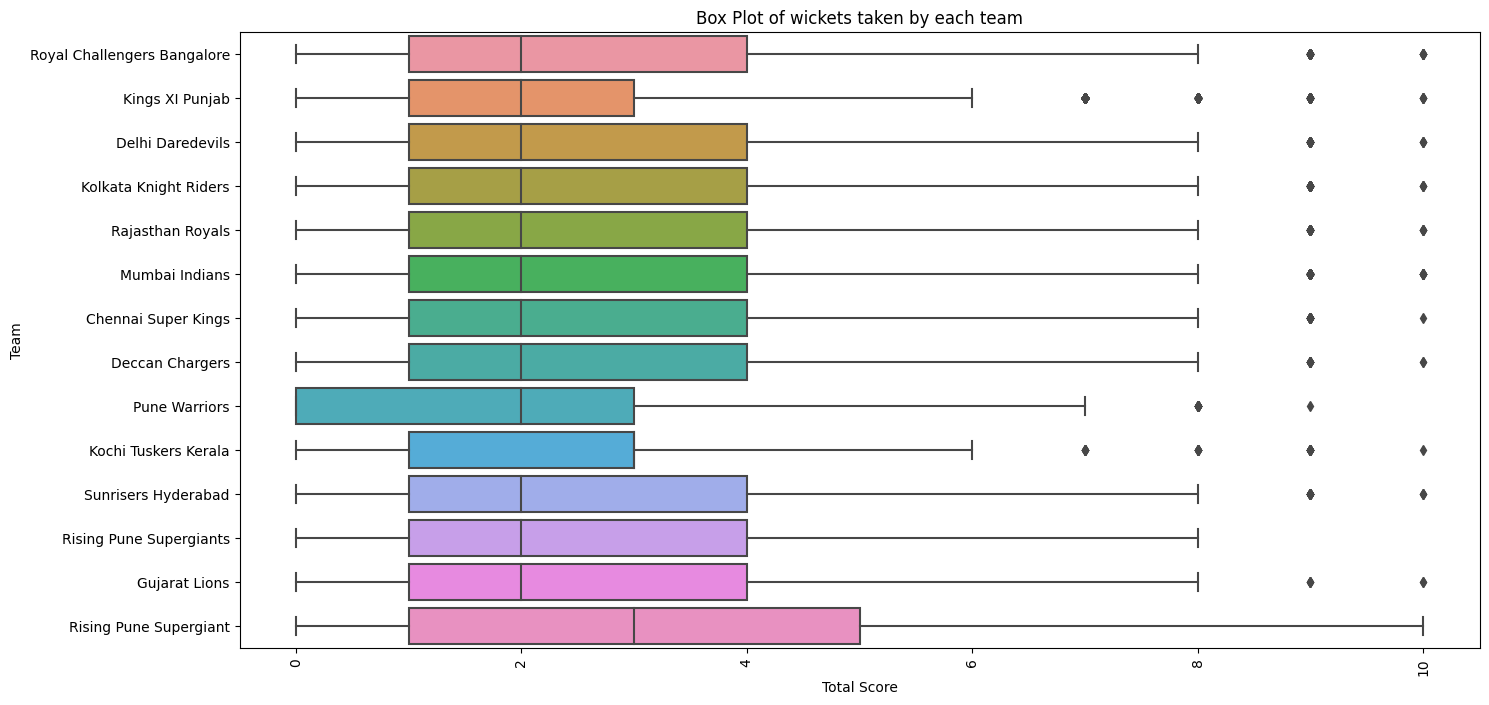

In [ ]:
plt.figure(figsize=(16, 8))
sns.boxplot(x="wickets", y="bowl_team", data=data)
plt.title(f'Box Plot of wickets taken by each team')
plt.ylabel('Team')
plt.xlabel('Total Score')
plt.xticks(rotation=90)
plt.show()

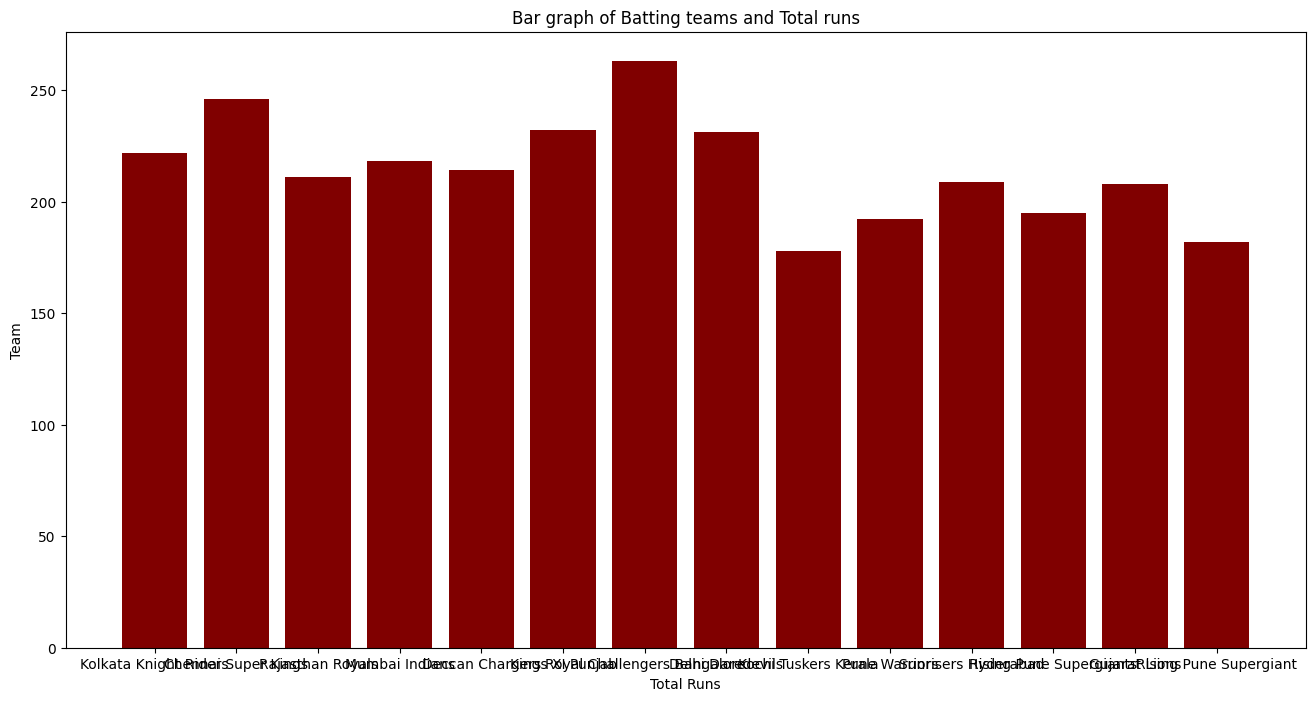

In [ ]:
plt.figure(figsize=(16, 8))
plt.bar(data["bat_team"], data["total"], color ='maroon')

plt.xlabel("Total Runs")
plt.ylabel("Team")
plt.title("Bar graph of Batting teams and Total runs")
plt.show()

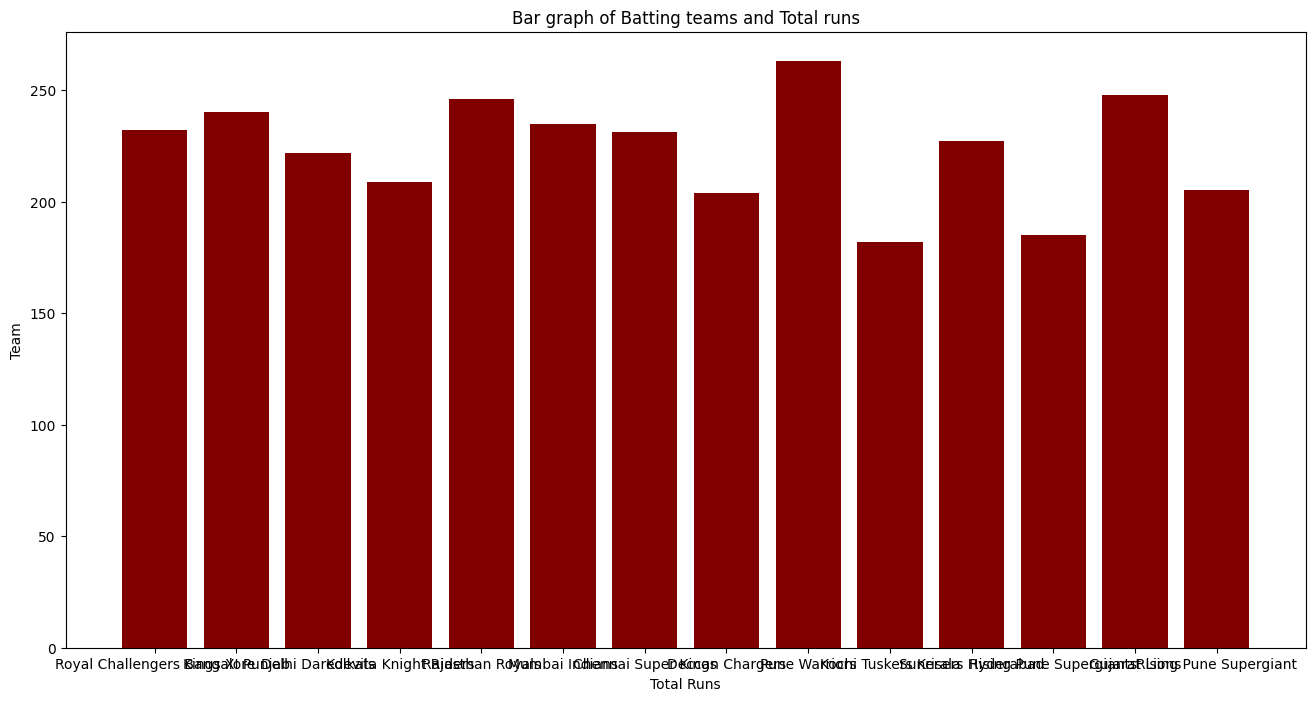

In [ ]:
plt.figure(figsize=(16, 8))
plt.bar(data["bowl_team"], data["total"], color ='maroon')

plt.xlabel("Total Runs")
plt.ylabel("Team")
plt.title("Bar graph of Batting teams and Total runs")
plt.show()

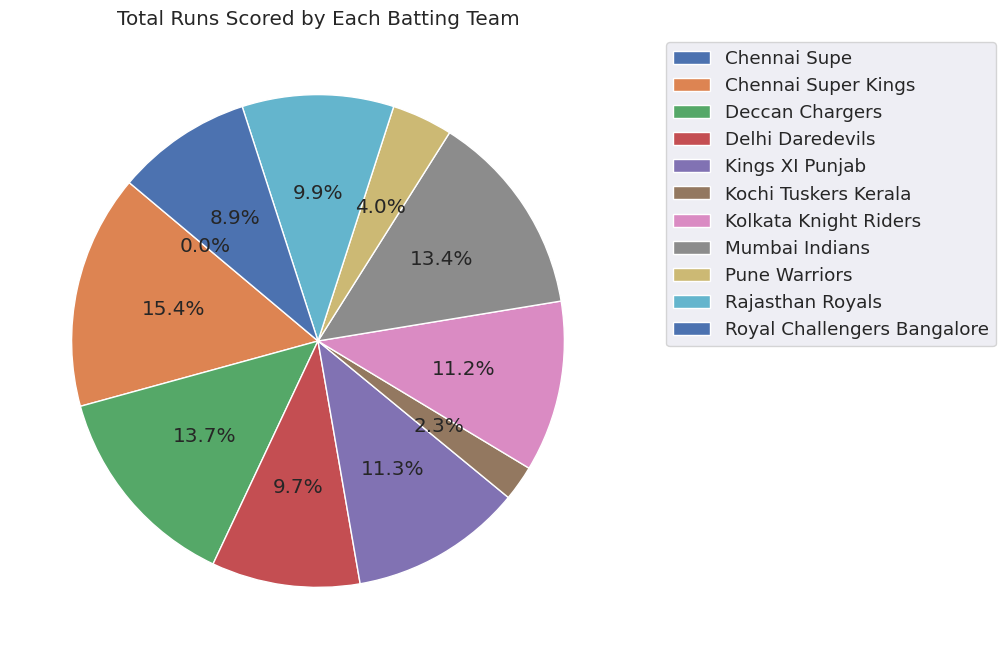

In [ ]:
bat_team_total_runs = data.groupby('bat_team')['total'].sum().reset_index()
team_colors = sns.color_palette("pastel", len(bat_team_total_runs['bat_team']))

plt.figure(figsize=(16, 8))
sns.set_palette(team_colors)
sns.set(style="whitegrid")
sns.set(font_scale=1.2)
plt.title("Total Runs Scored by Each Batting Team")
plt.pie(bat_team_total_runs['total'], autopct='%1.1f%%', startangle=140)
plt.legend(bat_team_total_runs['bat_team'], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

## Pre-Processing

In [ ]:
data = pd.read_csv("/content/ipl.csv")


# computing runs in each ball and adding it to dataset
data['runs_in_each_ball'] = 0

previous_runs = 0
prev = 1
next = 1

for index in range(len(data)):
    current_runs = data.at[index, 'runs']
    next = data.at[index, 'mid']

    if(next != prev):
      previous_runs = 0

    data.at[index, 'runs_in_each_ball'] = current_runs - previous_runs
    prev = next
    previous_runs = current_runs


# removing rows with NULL values
data = data.dropna()

# keeping useful data
cols = ["mid", "date", "bat_team", "bowl_team", "runs", "wickets", "overs", "runs_last_5", "wickets_last_5", "total", "runs_in_each_ball"]
data = data[cols]

# keeping only consistent teams
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

print('Before removing inconsistent teams: {}'.format(data.shape))
data = data[(data['bat_team'].isin(consistent_teams)) & (data['bowl_team'].isin(consistent_teams))]
print('After removing inconsistent teams: {}'.format(data.shape))

data = data[data['overs']>=5.0]

#taking care of categorical data
encodedData = pd.get_dummies(data=data, columns=['bat_team', 'bowl_team'])

# Converting the column 'date' from string into datetime object
encodedData['date'] = pd.to_datetime(encodedData['date'])

Before removing inconsistent teams: (76014, 11)
After removing inconsistent teams: (53811, 11)


## Model Building

In [ ]:
X_train = encodedData.drop(labels='total', axis=1)[encodedData['date'].dt.year <= 2016]
X_test = encodedData.drop(labels='total', axis=1)[encodedData['date'].dt.year >= 2017]

y_train = encodedData[encodedData['date'].dt.year <= 2016]['total'].values
y_test = encodedData[encodedData['date'].dt.year >= 2017]['total'].values

X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

print("Training set: {} and Test set: {}".format(X_train.shape, X_test.shape))

Training set: (37330, 23) and Test set: (2778, 23)


Linear Regression

In [ ]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)

y_pred_lr = linear_regressor.predict(X_test)

print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_lr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_lr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_lr))))

Mean Absolute Error (MAE): 12.148358985166867
Mean Squared Error (MSE): 254.05958628019175
Root Mean Squared Error (RMSE): 15.939246728757032


Decision Tree

In [ ]:
decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(X_train,y_train)

y_pred_dt = decision_regressor.predict(X_test)

print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_dt)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_dt)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_dt))))

Mean Absolute Error (MAE): 16.924766018718504
Mean Squared Error (MSE): 486.9434845212383
Root Mean Squared Error (RMSE): 22.066795973163806


Random Forest

In [ ]:
random_regressor = RandomForestRegressor()
random_regressor.fit(X_train,y_train)

y_pred_rf = random_regressor.predict(X_test)

print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_rf)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_rf)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_rf))))

Mean Absolute Error (MAE): 13.159046076313896
Mean Squared Error (MSE): 294.4111811015119
Root Mean Squared Error (RMSE): 17.158414294494463


## ADA-Boosting



In [ ]:
adb_regressor = AdaBoostRegressor(base_estimator=linear_regressor, n_estimators=100)
adb_regressor.fit(X_train, y_train)

y_pred_adb = adb_regressor.predict(X_test)

print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_adb)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_adb)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_adb))))

Mean Absolute Error (MAE): 12.067521299858264
Mean Squared Error (MSE): 245.46212584436876
Root Mean Squared Error (RMSE): 15.667230956501815


# Model 2 - Prediction of Next Ball

## Pre-Processing

In [ ]:
data = pd.read_csv("/content/ipl.csv")


# computing runs in each ball and adding it to dataset
data['runs_in_each_ball'] = 0

previous_runs = 0
prev = 1
next = 1

for index in range(len(data)):
    current_runs = data.at[index, 'runs']
    next = data.at[index, 'mid']

    if(next != prev):
      previous_runs = 0

    data.at[index, 'runs_in_each_ball'] = current_runs - previous_runs
    prev = next
    previous_runs = current_runs


# removing rows with NULL values
data = data.dropna()

# keeping useful data
cols = ["bat_team", "bowl_team", "runs", "wickets", "overs", "runs_last_5", "runs_in_each_ball"]
data = data[cols]

#taking care of categorical data
encodedData = pd.get_dummies(data=data, columns=['bat_team', 'bowl_team'])

## Data Anylasis

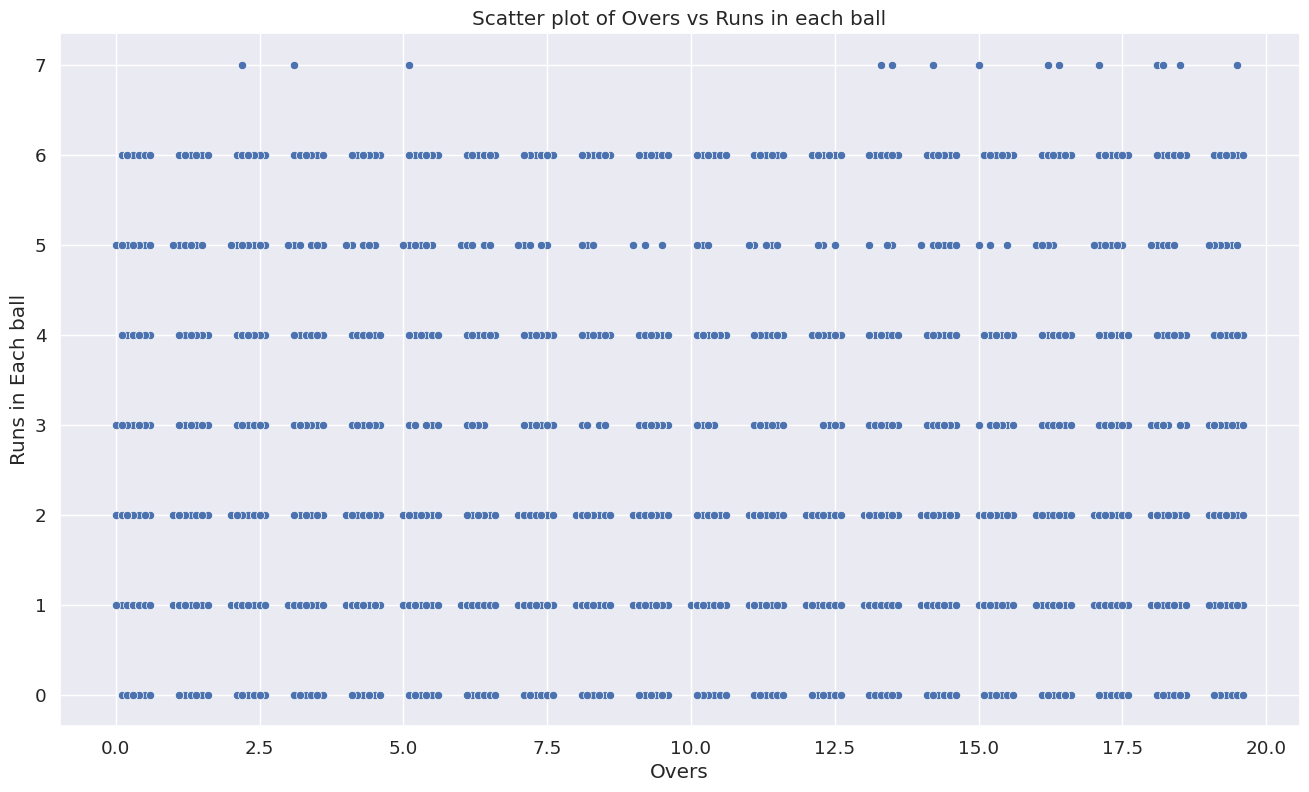

In [ ]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=data, x="overs", y="runs_in_each_ball")
plt.title(f"Scatter plot of Overs vs Runs in each ball")
plt.xlabel("Overs")
plt.ylabel("Runs in Each ball")
plt.grid(True)
plt.show()

## Model Selection

In [ ]:
X = encodedData.drop('runs_in_each_ball', axis=1)
y = encodedData['runs_in_each_ball']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Logistic Regression

In [ ]:
model = LogisticRegression(max_iter=10000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

classification_rep = classification_report(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}\n')
print('Classification Report:')
print(classification_rep)

Accuracy: 0.47714266921002435

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.46      0.49      5426
           1       0.46      0.76      0.57      6200
           2       0.00      0.00      0.00      1094
           3       0.00      0.00      0.00        48
           4       0.25      0.00      0.00      1734
           5       0.00      0.00      0.00        38
           6       0.05      0.00      0.00       659
           7       0.00      0.00      0.00         4

    accuracy                           0.48     15203
   macro avg       0.16      0.15      0.13     15203
weighted avg       0.40      0.48      0.41     15203



Random Forest Classifier

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

classification_rep = classification_report(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}\n')
print('Classification Report:')
print(classification_rep)

Accuracy: 0.3904492534368217

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.47      0.45      5426
           1       0.43      0.52      0.47      6200
           2       0.09      0.04      0.06      1094
           3       0.00      0.00      0.00        48
           4       0.11      0.06      0.08      1734
           5       0.00      0.00      0.00        38
           6       0.06      0.03      0.04       659
           7       0.00      0.00      0.00         4

    accuracy                           0.39     15203
   macro avg       0.14      0.14      0.14     15203
weighted avg       0.35      0.39      0.37     15203



Multi-Level Perceptron

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(150, 75), max_iter=500, activation='relu', random_state=42)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}\n')
print('Classification Report:')
print(classification_rep)

Accuracy: 0.476419127803723

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.45      0.48      5426
           1       0.46      0.76      0.58      6200
           2       0.00      0.00      0.00      1094
           3       0.00      0.00      0.00        48
           4       0.23      0.04      0.07      1734
           5       0.00      0.00      0.00        38
           6       0.15      0.00      0.01       659
           7       0.00      0.00      0.00         4

    accuracy                           0.48     15203
   macro avg       0.17      0.16      0.14     15203
weighted avg       0.41      0.48      0.42     15203

